In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

In [51]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags,method="ols")
    plt.show()

In [29]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [13]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [38]:
import scipy.stats as st
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [47]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [53]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=[lags])
    return result

# Series 1

In [3]:
y = series1

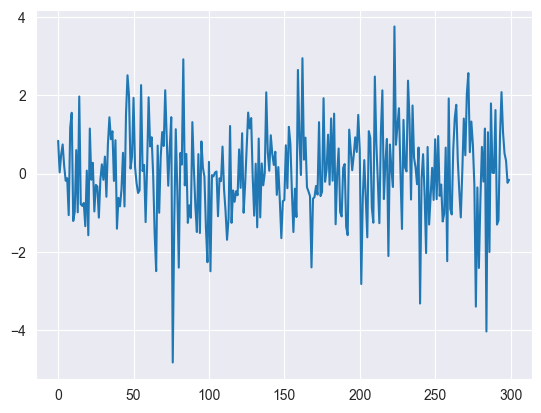

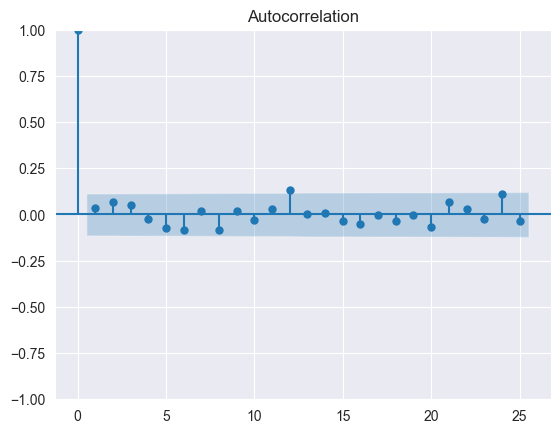

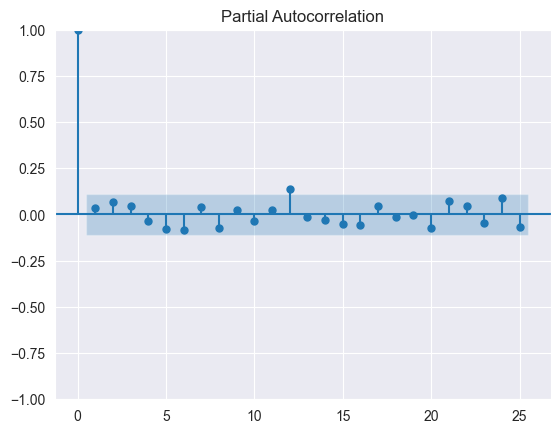

In [5]:
plot_graphs(y, 25)

In [30]:
stats = statistics(y)
stats

{'mean': 0.03204999999999999,
 'std': 1.1917206555369144,
 'kur': 1.0675251856145698,
 'skewness': -0.28098719113429144}

In [14]:
adf(y)

ADF test for the original series
Statistic Value: -16.608478794575788
p-value: 1.7393390174742348e-29


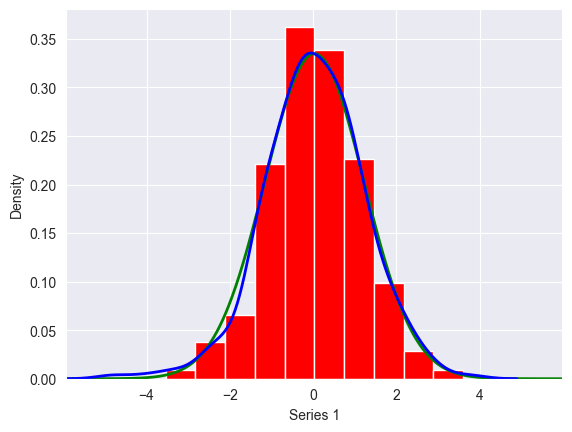

In [44]:
hist(y, mean=stats['mean'], std=stats['std'])

In [48]:
shap(y)

Saphiro ShapiroResult(statistic=0.9886824488639832, pvalue=0.019417403265833855)


In [54]:
box_test(y, 20)

,lb_stat,lb_pvalue
20,18.804159,0.534587


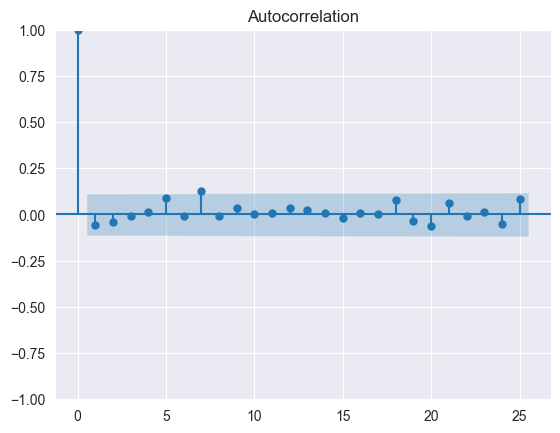

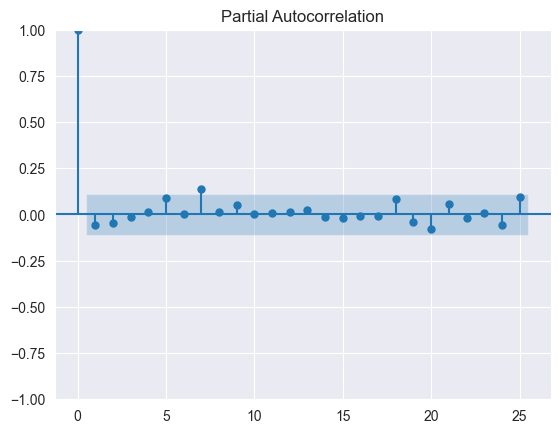

In [52]:
plot_graphs(y**2, 25, acf_only=True)

In [55]:
box_test(y**2, 20)

,lb_stat,lb_pvalue
20,14.167724,0.821891


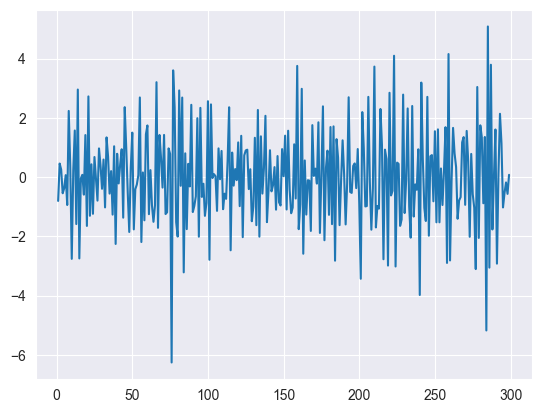

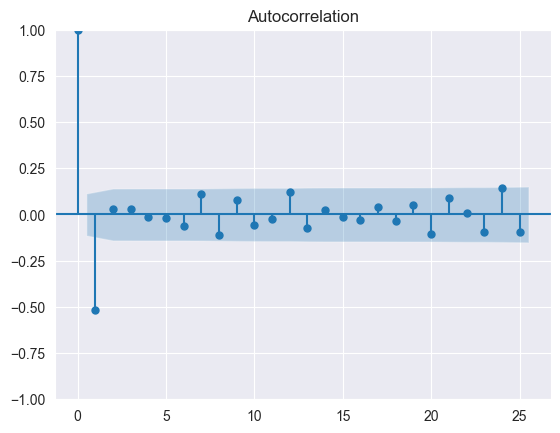

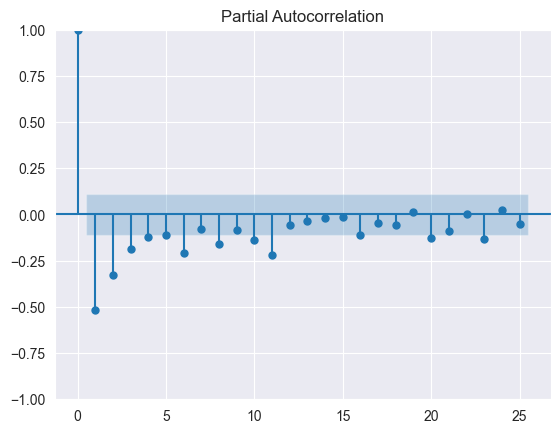

In [56]:
z = y.diff().dropna()
plot_graphs(z, 25)

In [58]:
stats = statistics(z)
stats

{'mean': -0.0033311036789297403,
 'std': 1.655382523284908,
 'kur': 0.47527965456792565,
 'skewness': 0.02784767622260606}

In [59]:
adf(z)

ADF test for the original series
Statistic Value: -10.26201506316342
p-value: 4.212550739162451e-18


In [60]:
print('Ljung-Box for z')
box_test(z,20)

Ljung-Box for z


,lb_stat,lb_pvalue
20,105.271571,1.418501e-13


In [61]:
print("Ljung-Box for z**2")
box_test(z**2, 20)

Ljung-Box for z**2


,lb_stat,lb_pvalue
20,46.318747,0.000729


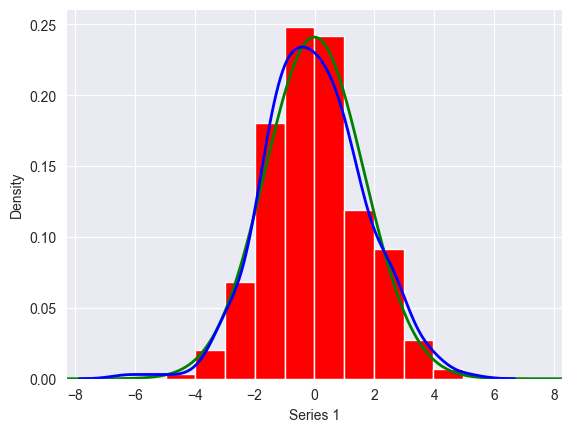

In [62]:
hist(z,mean=stats['mean'], std=stats['std'])

In [63]:
shap(z)

Saphiro ShapiroResult(statistic=0.9928926825523376, pvalue=0.16682694852352142)


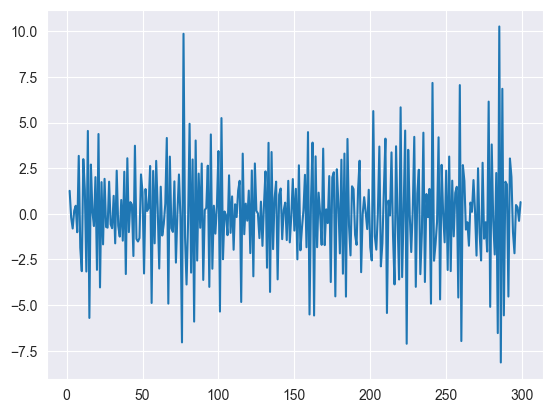

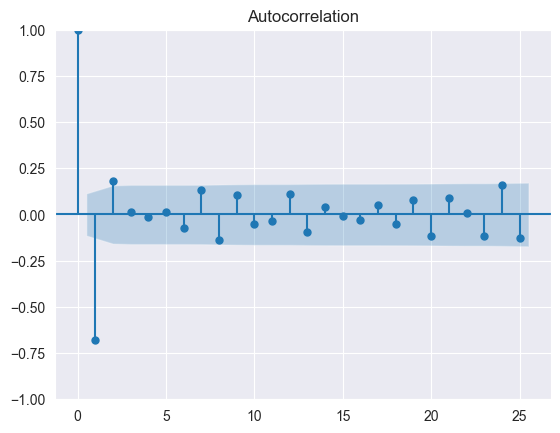

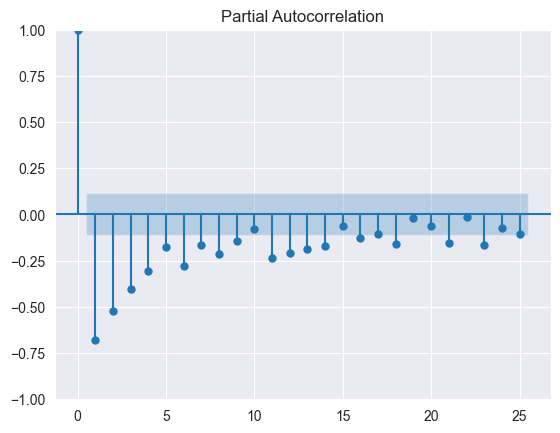

In [64]:
zz = y.diff(1).diff(1).dropna()
plot_graphs(zz, 25)

In [65]:
adf(zz)

ADF test for the original series
Statistic Value: -11.067991929863254
p-value: 4.629393803953821e-20


In [66]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,181.43061,5.093461e-28


In [67]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,91.06279,4.829546e-11


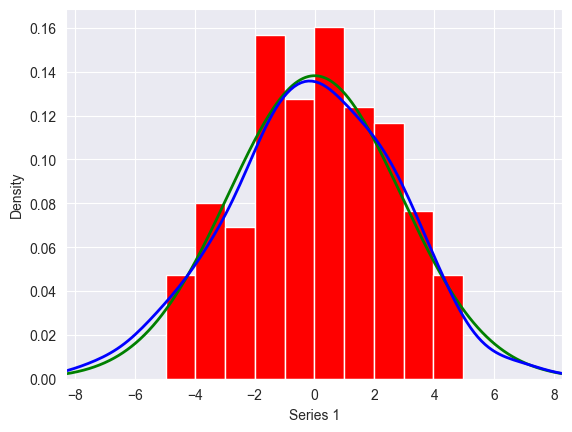

In [68]:
hist(zz,mean=stats['mean'], std=stats['std'])

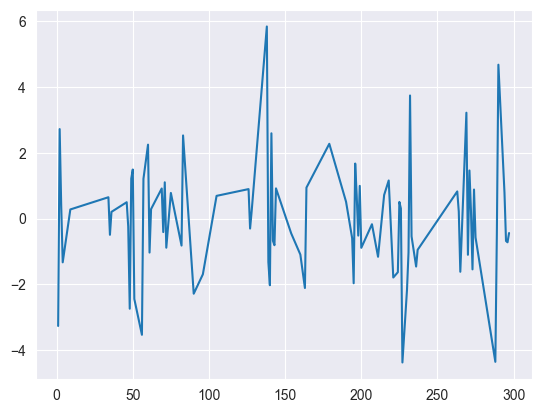

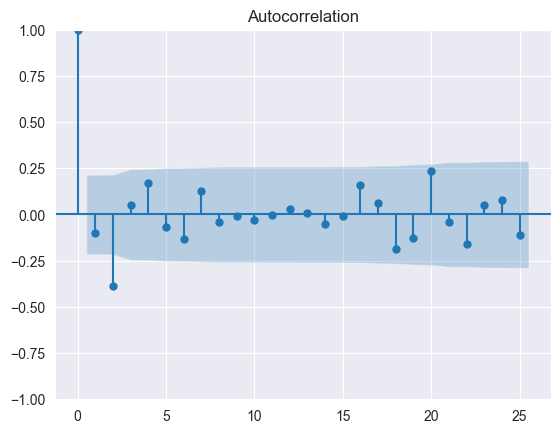

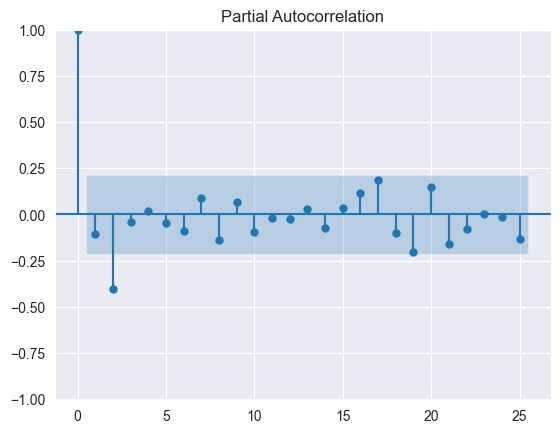

In [75]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
num_lags = 25
plot_graphs(zz, num_lags=num_lags)

In [76]:
adf(zz)

ADF test for the original series
Statistic Value: -10.187132457391316
p-value: 6.4643330265622475e-18


In [77]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,36.500706,0.013423


In [72]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,13.664856,0.847074


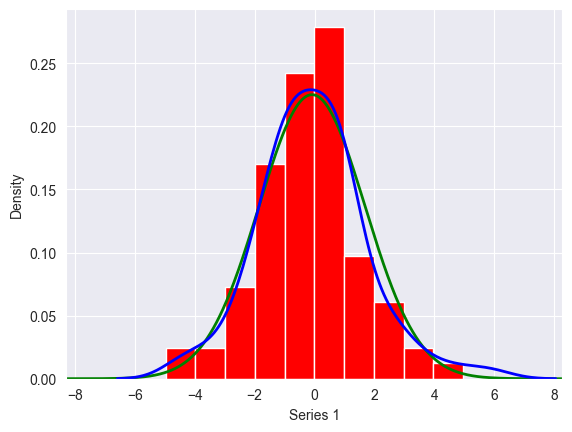

In [78]:
hist(zz,mean=stats['mean'], std=stats['std'])

In [74]:
shap(zz)

Saphiro ShapiroResult(statistic=0.9747852683067322, pvalue=0.09794547408819199)
